# WrestlerDataSet

### The dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

data = {
    "Wrestler": [f"Wrestler {i+1}" for i in range(50)],
    "Age": np.random.randint(20, 40, size=50).astype(float),
    "Weight": np.random.randint(180, 300, size=50).astype(float),
    "Height": np.random.randint(65, 80, size=50).astype(float),
    "Wins": np.random.randint(0, 100, size=50).astype(float),
    "Losses": np.random.randint(0, 50, size=50).astype(float),
    "Rank": np.random.randint(1, 10, size=50).astype(float)
}

data['Age'][5] = np.nan
data['Weight'][10] = 500  
data['Wins'][20] = np.nan
data['Losses'][30] = -10  
data['Rank'][40] = 20  

wrestlers_df = pd.DataFrame(data)

print(wrestlers_df.head())
print(wrestlers_df.dtypes)

       Wrestler   Age  Weight  Height  Wins  Losses  Rank
0    Wrestler 1  32.0   284.0    66.0  86.0    19.0   8.0
1    Wrestler 2  35.0   296.0    70.0  43.0    33.0   6.0
2    Wrestler 3  20.0   197.0    74.0  11.0    40.0   4.0
3    Wrestler 4  23.0   259.0    68.0   2.0    32.0   5.0
4    Wrestler 5  23.0   184.0    65.0  51.0    36.0   6.0
5    Wrestler 6   NaN   285.0    70.0  80.0     6.0   4.0
6    Wrestler 7  29.0   222.0    79.0  32.0    21.0   4.0
7    Wrestler 8  39.0   238.0    65.0  54.0    31.0   8.0
8    Wrestler 9  38.0   211.0    66.0   0.0    13.0   8.0
9   Wrestler 10  24.0   181.0    67.0  38.0     7.0   4.0
10  Wrestler 11  26.0   500.0    69.0  19.0    24.0   3.0
11  Wrestler 12  32.0   283.0    67.0  46.0    15.0   4.0
12  Wrestler 13  21.0   221.0    65.0  42.0    41.0   8.0
13  Wrestler 14  26.0   237.0    78.0  56.0    18.0   8.0
14  Wrestler 15  27.0   215.0    68.0  60.0    40.0   6.0
15  Wrestler 16  34.0   282.0    67.0  77.0    15.0   2.0
16  Wrestler 1

Above mentioned is a randomly generated dataset.
Given are wrestlers and their career statistics.
The goal is to see how age,weight and height effects the wins.

The units for the columns in the dataset are as follows:
Weight: Pounds (lbs)
Height: Inches (in)


### Looking For Outliers

Nothing easily noticable. However there seems to be around 1 outlier in the plots.
Let us check it out.

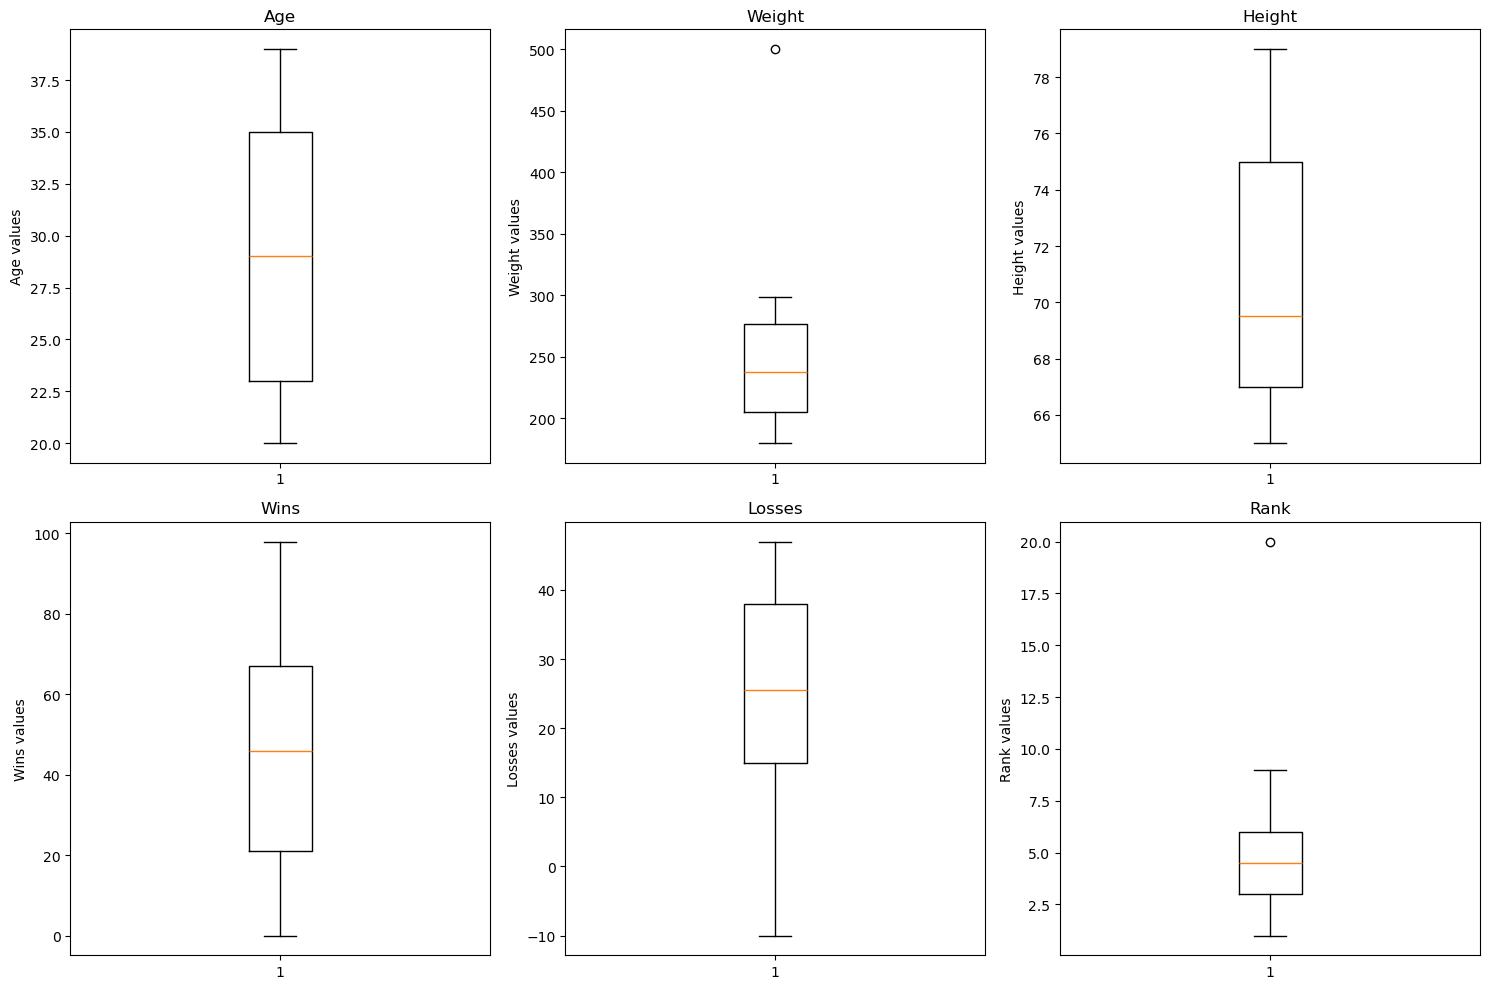

In [2]:
numerical_columns=['Age', 'Weight', 'Height', 'Wins', 'Losses', 'Rank']
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    plt.boxplot(x=wrestlers_df[feature].dropna())
    plt.title(feature)
    plt.ylabel(feature+' values')
plt.tight_layout()
plt.show()

Using a box plot for all the features we can now see the outliers that are present in the Rank and Weight values.

### Checking For Null Values

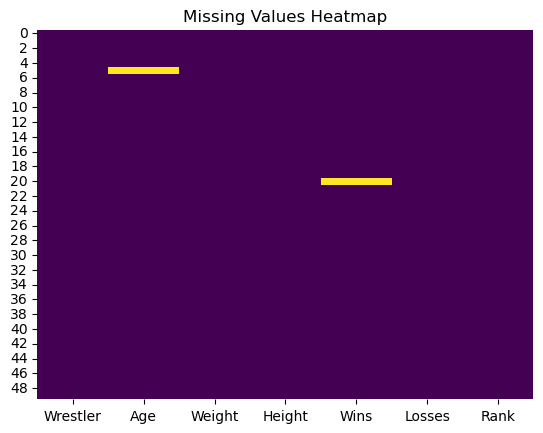

In [3]:
#MORE TIPS
sns.heatmap(wrestlers_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [4]:
for _ in wrestlers_df.columns:
    print(f"{_}\t{wrestlers_df[str(_)].isna().sum()}")

Wrestler	0
Age	1
Weight	0
Height	0
Wins	1
Losses	0
Rank	0


## Cleaning the Data

In [5]:
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49.0,29.285714,6.698881,20.0,23.0,29.0,35.0,39.0
Weight,50.0,244.360000,52.191469,180.0,205.0,238.0,277.0,500.0
Height,50.0,71.040000,4.746470,65.0,67.0,69.5,75.0,79.0
Wins,49.0,45.693878,28.685946,0.0,21.0,46.0,67.0,98.0
Losses,50.0,25.300000,14.595568,-10.0,15.0,25.5,38.0,47.0
Rank,50.0,5.060000,3.285155,1.0,3.0,4.5,6.0,20.0


In [6]:
wrestlers_df.fillna(wrestlers_df['Age'].mean(),inplace=True)


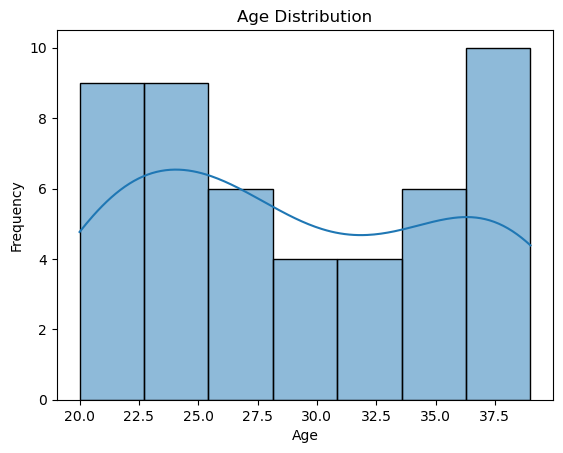

In [20]:
sns.histplot(wrestlers_df['Age'],kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

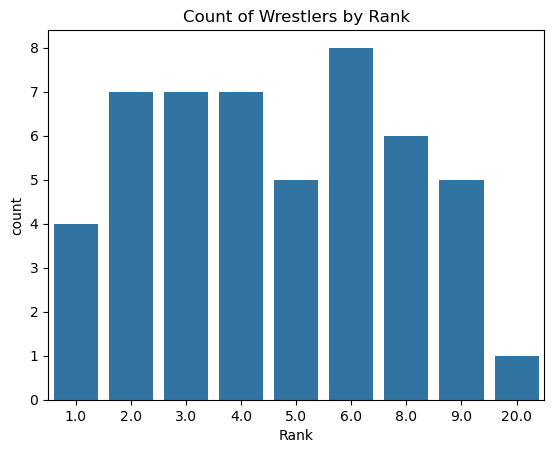

In [8]:
sns.countplot(x='Rank', data=wrestlers_df)
plt.title("Count of Wrestlers by Rank")
plt.show()

There is a rank here that is 20. This is most likely one of the outliers.

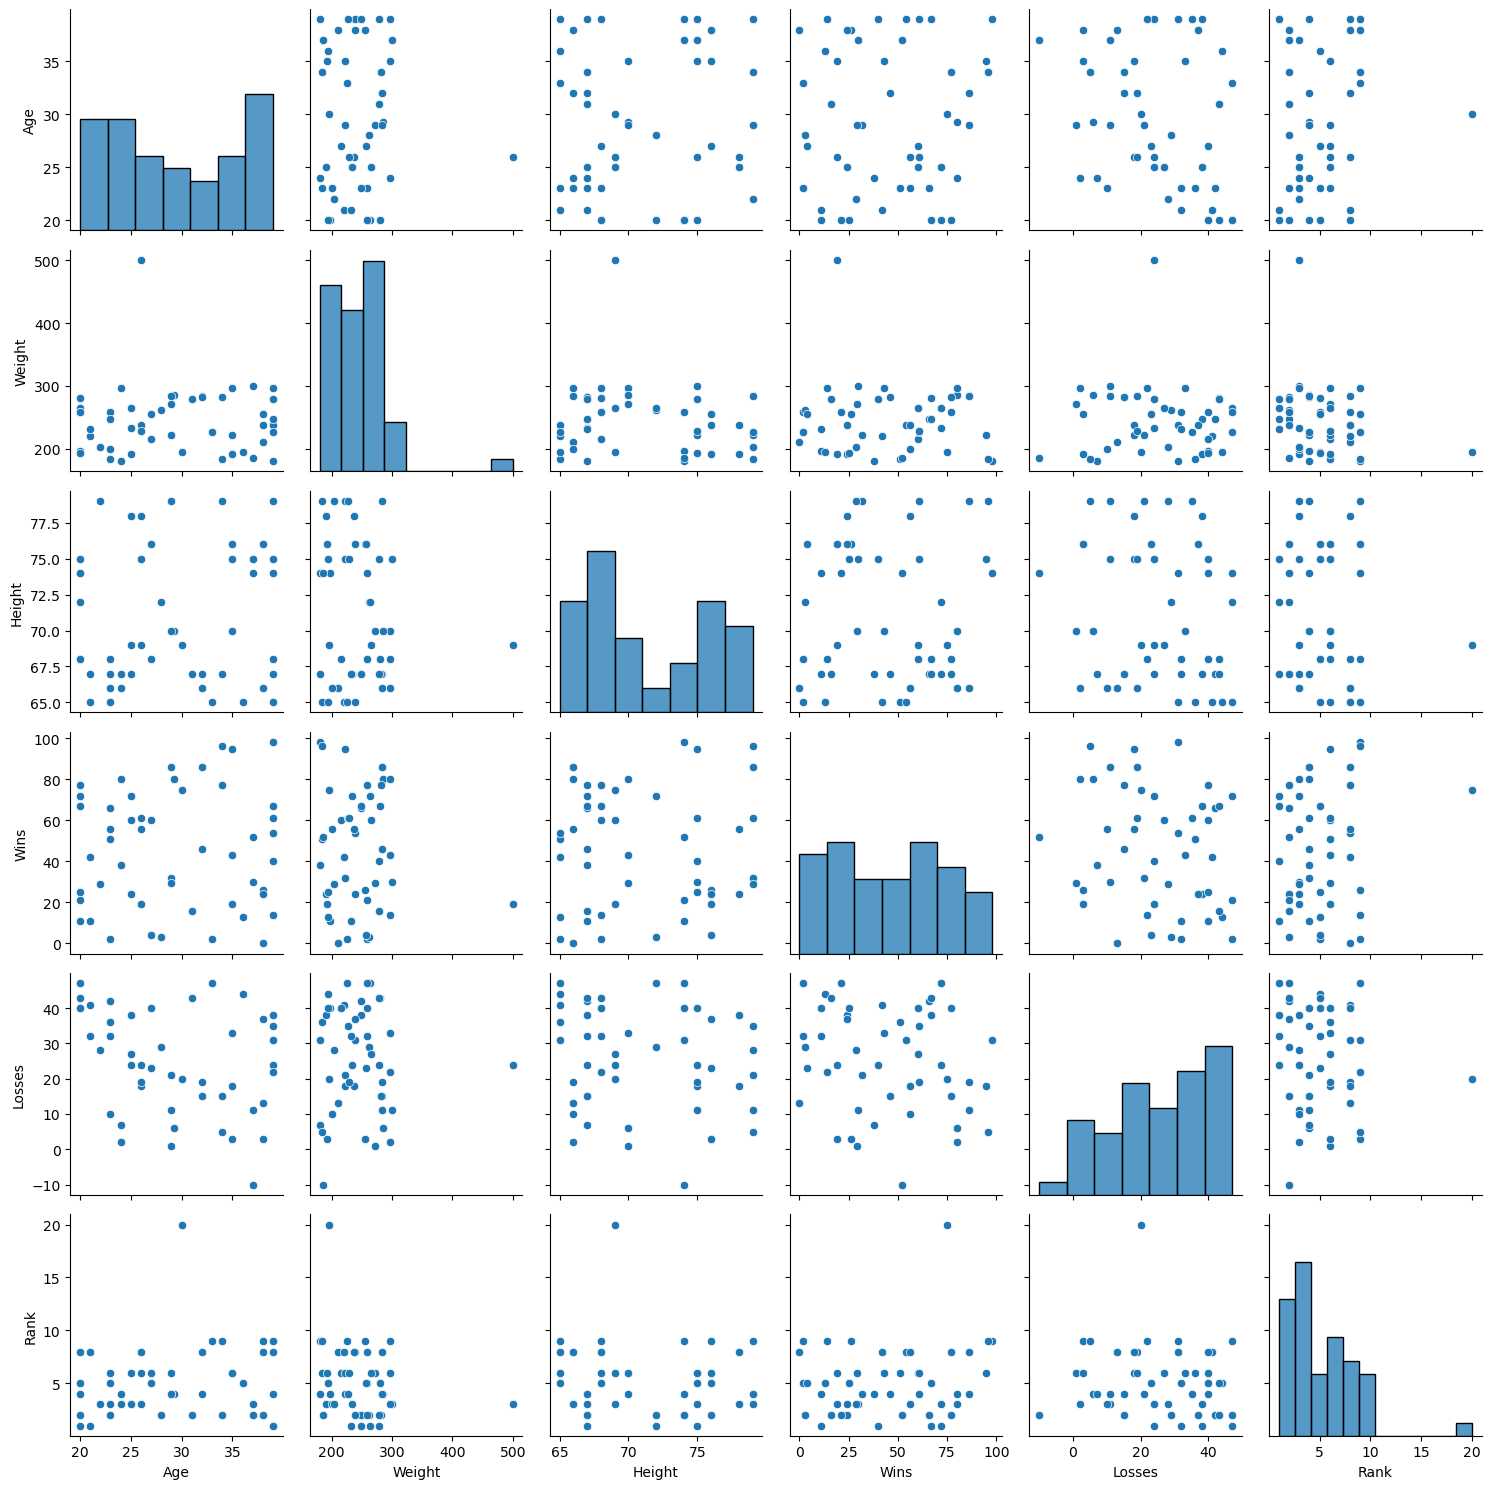

In [9]:
sns.pairplot(wrestlers_df)
plt.tight_layout()

In [15]:
wrestlers_df = wrestlers_df[wrestlers_df['Losses'] >= 0]
wrestlers_df = wrestlers_df[wrestlers_df['Rank'] <= 10]

In [24]:
wrestlers_df.describe()


,Age,Weight,Height,Wins,Losses,Rank
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,29.110119,241.145833,71.020833,44.610119,26.145833,4.812500
std,6.672426,36.268496,4.817917,28.736752,13.937535,2.498138
min,20.000000,180.000000,65.000000,0.000000,1.000000,1.000000
25%,23.000000,214.000000,67.000000,20.500000,15.000000,3.000000
50%,28.500000,238.000000,69.500000,42.500000,27.500000,4.500000
75%,35.000000,273.000000,75.000000,67.000000,38.500000,6.000000
max,39.000000,299.000000,79.000000,98.000000,47.000000,9.000000


In [10]:
Q1 = wrestlers_df['Weight'].quantile(0.25)
Q3 = wrestlers_df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
wrestlers_df['Weight'] = np.where(
    (wrestlers_df['Weight'] < lower_bound) | (wrestlers_df['Weight'] > upper_bound),
    wrestlers_df['Weight'].median(),
    wrestlers_df['Weight'])

In [11]:
wrestlers_df.head()

,Wrestler,Age,Weight,Height,Wins,Losses,Rank
0,Wrestler 1,32.0,284.0,66.0,86.0,19.0,8.0
1,Wrestler 2,35.0,296.0,70.0,43.0,33.0,6.0
2,Wrestler 3,20.0,197.0,74.0,11.0,40.0,4.0
3,Wrestler 4,23.0,259.0,68.0,2.0,32.0,5.0
4,Wrestler 5,23.0,184.0,65.0,51.0,36.0,6.0


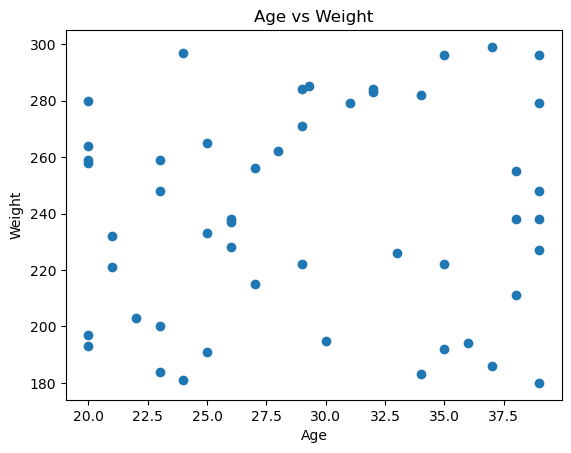

In [12]:
plt.scatter(wrestlers_df['Age'], wrestlers_df['Weight'])
plt.title("Age vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

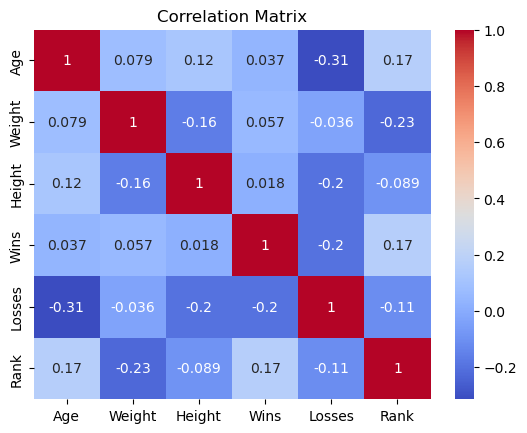

In [13]:
numerical_features = wrestlers_df.select_dtypes(include=[np.number])
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [25]:
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48.0,29.110119,6.672426,20.0,23.0,28.5,35.0,39.0
Weight,48.0,241.145833,36.268496,180.0,214.0,238.0,273.0,299.0
Height,48.0,71.020833,4.817917,65.0,67.0,69.5,75.0,79.0
Wins,48.0,44.610119,28.736752,0.0,20.5,42.5,67.0,98.0
Losses,48.0,26.145833,13.937535,1.0,15.0,27.5,38.5,47.0
Rank,48.0,4.812500,2.498138,1.0,3.0,4.5,6.0,9.0


Not enough data to apply ML.

Hence, there is no need to force predictive analytical.
# Instead the data can be used to make inferences